### Import Library yang Diperlukan

In [1]:
#library & package. 
#Jalankan ulang jika menambahkan library baru

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re, string
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Bussiness Understanding

Pada Tugas ini saya akan mengangkat topik "Aset Kripto", alasan saya mengangkat topik tersebut, karena mungkin bagi 
masyarakat indonesia terutama di kota-kota besar mungkin investasi biasa seperti properti, saham di perusahaan, dan
investasi lainnya mungkin sudah terdengar biasa, saya ingin melihat bagaimana reaksi masyarakat terhadap aset investasi
yang bisa dibilang baru di indonesia, yaitu aset kripto seperti Bitcoin, ethereum, NFT, dan lain-lain, apakah investasi
tersebut disambut positif oleh masyarakat indonesia atau malah dianggap negatif

In [10]:
search_words = "Aset Kripto"
date_since = "2022-01-23"
date_until = "2022-01-26"
#new_search = search_words + " -filter:retweets"

# Data Collection

- Pada bagian ini Data dari tweet dan retweet dari tanggal 23 - 26 Januari 2022 akan diambil untuk data testing model
- Sedangkan untuk training model saya menggunakan dataset yang disediakan oleh modul

### Siapkan Token Tweet dan Data Training

In [7]:
# Data Token untuk mengambil tweet dan retweet
with open("token2.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']


# Data untuk training model
df_training = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')

In [13]:
# Mempersiapkan API V1
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [27]:
# Fungsi untuk mengambil tweet
tweets = tweepy.Cursor(api.search_tweets, q = search_words, tweet_mode='extended', since=date_since, until=date_until, lang="id").items(1000)
tweet, retweet, = [], []
for i in tweets :
    if hasattr(i, 'retweeted_status') :
        tweet.append(i.retweeted_status.full_text)
        retweet.append(i.retweeted_status.user.screen_name)
    else :
        tweet.append(i.full_text)
        retweet.append(print(''))


Unexpected parameter: since
Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


Unexpected parameter: since


TweepyException: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)

[]

In [5]:
#ambil data pada twitter dengan kata kunci tersebut.
#ambil sebanyak 300 tweet

tweets = tweepy.Cursor(api.search_tweets,
        q=new_search,
        lang="id",
        since=date_since).items(300)

In [6]:
items = []
for tweet in tweets :
    items.append (tweet.text)
hasil = pd.DataFrame(data=items, columns=['tweet'])
print(len(hasil))

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


300


In [7]:
#masukkan pada datarame dan tampilkan dataframenya

df = pd.DataFrame(hasil)
df
#hasil = None

,tweet
0,@aset_kripto karena kebijakan The Fed soal suk...
1,"@YuliantoTopik @aset_kripto iya, kalau sesuai ..."
2,OJK Larang Lembaga Keuangan Fasilitasi Pembiay...
3,Check out my #COMPOSITE analysis on https://t....
4,@HasanXixi @aset_kripto naik dlu baru dibanting
...,...
295,tau gak sih potensi pertumbuhan aset kripto di...
296,Sekarang kan akses buat kita investasi aset kr...
297,"CMO Tokocrypto emang de best deh, kini gue mak..."
298,Teman teman semua ada kabar baik nih. Siapa d...


In [8]:
#Lakukan Text Preprocessing (lakukan sebaik mungkin). Masukkan pada dataframe kalian dengan nama kolom tweet_clean.

clean_tweet = df['tweet']
clean_tweet2 = []
filtering = stopwords.words('indonesian', 'english')

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [9]:
for i in range(len(clean_tweet)) :
    lower_case = clean_tweet[i].lower()
    hapus_angka = re.sub(r"\d+", "", lower_case)
    kalimat = hapus_angka.split()
    tanda_baca = [word for word in kalimat if word not in filtering]
    hasil_stopwords = ' '.join(tanda_baca)
    tanda_baca = hasil_stopwords.translate(str.maketrans("","", string.punctuation))
    whitespace = tanda_baca.strip()
    hasil_bersih = stemmer.stem(whitespace)

    clean_tweet2.append(hasil_bersih)

In [10]:
#Tampilkan dataframe
#jangan lupa lakukan pembersihan slang word/bahasa gaul

#Pembersihan Slang word yang terdapat pada stopword
df['tweet_clean'] = clean_tweet2

In [11]:
df

,tweet,tweet_clean
0,@aset_kripto karena kebijakan The Fed soal suk...,asetkripto bijak the fed suku bunga kah min yg lg
1,"@YuliantoTopik @aset_kripto iya, kalau sesuai ...",yuliantotopik asetkripto iya sesuai plan kaya ...
2,OJK Larang Lembaga Keuangan Fasilitasi Pembiay...,ojk larang lembaga uang fasilitas biaya aset k...
3,Check out my #COMPOSITE analysis on https://t....,check out my composite analysis on httpstcohvz...
4,@HasanXixi @aset_kripto naik dlu baru dibanting,hasanxixi asetkripto dlu banting
...,...,...
295,tau gak sih potensi pertumbuhan aset kripto di...,tau gak sih potensi tumbuh aset kripto bal loh...
296,Sekarang kan akses buat kita investasi aset kr...,akses investasi aset kripto siaplebihterhubung...
297,"CMO Tokocrypto emang de best deh, kini gue mak...",cmo tokocrypto emang de best deh gue semangat ...
298,Teman teman semua ada kabar baik nih. Siapa d...,teman teman kabar nih suka investasi aset krip...


In [12]:
tokenize = df['tweet_clean'].apply(lambda x : word_tokenize(str(x)))

## Distribusi frekuensi karakter per tweet

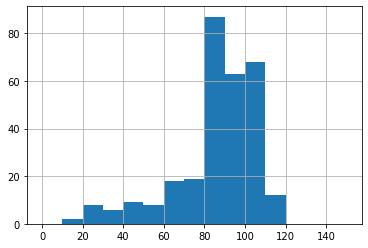

In [13]:
#lakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#tampilkan plot dari setiap analysis

bin_range = np.arange(0, 160, 10)
df['tweet_clean'].str.len().hist(bins=bin_range)
plt.show()

## Distribusi Frekuensi Panjang Kata Rata-Rata per Tweet

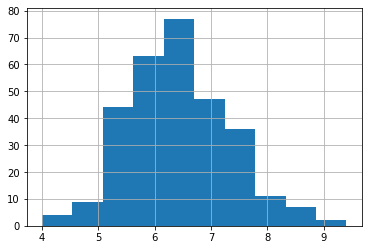

In [14]:
tokenize.apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

## Distribusi frekuensi kata per tweet

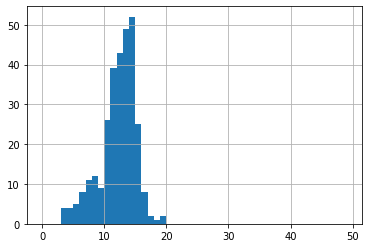

In [15]:
#dengan melihat word_frequency coba perbaiki pembersihan slang word pada tweet_clean

bin_range2 = np.arange(0, 50)
tokenize.map(lambda x: len(x)).hist(bins=bin_range2)
plt.show()

Analisis : Seperti yang kita liat frekuensi kata per tweet 10 - 16 kata pet tweet, coba kita melakukan pembersihan slang word pada tweet

# Pembersihan Kata Slang pada tweet

In [16]:
df2 = df

slang_list = open("./slangword2.txt","r")
kata_slang = slang_list.readlines()
kata_slang_bersih = []

for i in range(len(kata_slang)) :
    kata_slang_bersih.append(kata_slang[i].strip())

In [17]:
sampel = df2['tweet_clean']
non_slang_tweet = []

In [18]:
for i in range(len(sampel)) :
    kalimat1 = sampel[i].split()
    cek = [word for word in kalimat1 if word not in kata_slang_bersih]
    hasil_slang = ' '.join(cek)
    
    
    non_slang_tweet.append(hasil_slang)

In [19]:
df['tweet_no_slang'] = non_slang_tweet
df

,tweet,tweet_clean,tweet_no_slang
0,@aset_kripto karena kebijakan The Fed soal suk...,asetkripto bijak the fed suku bunga kah min yg lg,asetkripto bijak the fed suku bunga kah min
1,"@YuliantoTopik @aset_kripto iya, kalau sesuai ...",yuliantotopik asetkripto iya sesuai plan kaya ...,yuliantotopik asetkripto iya sesuai plan kaya ...
2,OJK Larang Lembaga Keuangan Fasilitasi Pembiay...,ojk larang lembaga uang fasilitas biaya aset k...,ojk larang lembaga uang fasilitas biaya aset k...
3,Check out my #COMPOSITE analysis on https://t....,check out my composite analysis on httpstcohvz...,check out my composite analysis on httpstcohvz...
4,@HasanXixi @aset_kripto naik dlu baru dibanting,hasanxixi asetkripto dlu banting,hasanxixi asetkripto banting
...,...,...,...
295,tau gak sih potensi pertumbuhan aset kripto di...,tau gak sih potensi tumbuh aset kripto bal loh...,tau sih potensi tumbuh aset kripto bal loh uda...
296,Sekarang kan akses buat kita investasi aset kr...,akses investasi aset kripto siaplebihterhubung...,akses investasi aset kripto siaplebihterhubung...
297,"CMO Tokocrypto emang de best deh, kini gue mak...",cmo tokocrypto emang de best deh gue semangat ...,cmo tokocrypto emang de best deh semangat siap...
298,Teman teman semua ada kabar baik nih. Siapa d...,teman teman kabar nih suka investasi aset krip...,teman teman kabar nih suka investasi aset krip...


In [20]:
tokenize2 = df['tweet_no_slang'].apply(lambda x : word_tokenize(str(x)))

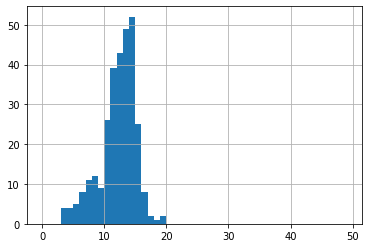

In [21]:
bin_range2 = np.arange(0, 50)
tokenize.map(lambda x: len(x)).hist(bins=bin_range2)
plt.show()

In [24]:
#tampilkan dataframe kalian

df2

,tweet,tweet_clean,tweet_no_slang
0,@aset_kripto karena kebijakan The Fed soal suk...,asetkripto bijak the fed suku bunga kah min yg lg,asetkripto bijak the fed suku bunga kah min
1,"@YuliantoTopik @aset_kripto iya, kalau sesuai ...",yuliantotopik asetkripto iya sesuai plan kaya ...,yuliantotopik asetkripto iya sesuai plan kaya ...
2,OJK Larang Lembaga Keuangan Fasilitasi Pembiay...,ojk larang lembaga uang fasilitas biaya aset k...,ojk larang lembaga uang fasilitas biaya aset k...
3,Check out my #COMPOSITE analysis on https://t....,check out my composite analysis on httpstcohvz...,check out my composite analysis on httpstcohvz...
4,@HasanXixi @aset_kripto naik dlu baru dibanting,hasanxixi asetkripto dlu banting,hasanxixi asetkripto banting
...,...,...,...
295,tau gak sih potensi pertumbuhan aset kripto di...,tau gak sih potensi tumbuh aset kripto bal loh...,tau sih potensi tumbuh aset kripto bal loh uda...
296,Sekarang kan akses buat kita investasi aset kr...,akses investasi aset kripto siaplebihterhubung...,akses investasi aset kripto siaplebihterhubung...
297,"CMO Tokocrypto emang de best deh, kini gue mak...",cmo tokocrypto emang de best deh gue semangat ...,cmo tokocrypto emang de best deh semangat siap...
298,Teman teman semua ada kabar baik nih. Siapa d...,teman teman kabar nih suka investasi aset krip...,teman teman kabar nih suka investasi aset krip...


In [25]:
pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()

In [38]:
hasil_sentimen = []
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']
items1 = list(df2['tweet_no_slang'])

In [45]:
for item in items1:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items1[items1.index(item)-1] in list_anti:
                    print(items1[items1.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items1[items1.index(item)-1] in list_anti:
                    print(items1[items1.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    hasil_sentimen.append(count_p - count_n)
    # print ("-----------------------------------------------------")

asetkripto bijak the fed suku bunga kah min
bijak
 ['positif']
positif: 1
negatif: 0
yuliantotopik asetkripto iya sesuai plan kaya gitu bear market
sesuai
 ['positif']
positif: 1
negatif: 0
ojk larang lembaga uang fasilitas biaya aset kripto httpstcovbsgttbbz
positif: 0
negatif: 0
check out my composite analysis on httpstcohvzaag btc alami jatuh awa httpstcoibxmduv
alami
 ['positif']
positif: 1
negatif: 0
hasanxixi asetkripto banting
positif: 0
negatif: 0
asetkripto beda negara kompak fudder crypto
kompak
 ['positif']
positif: 1
negatif: 0
feriniceee coba saham amp instrumen investasi
positif: 0
negatif: 0
asetkripto main bandar doang gara pasar bsok banting
positif: 0
negatif: 0
asetkripto cicil ah
positif: 0
negatif: 0
asetkripto ngebentuk double top tu
positif: 0
negatif: 0
bitcoin unjuk gigi mayoritas aset kripto darah httpstcozddrtddnb
positif: 0
negatif: 0
ojk masyarakat aset kripto jenis komoditi milik fluktuasi nilai waktu httpstcopltlzvvb
positif: 0
negatif: 0
resmi ojk larang

In [49]:
hasil_sentimen2 = []
for i in range(len(hasil_sentimen)) :
    kal = hasil_sentimen[i]
    if kal < 0 :
        hasil_sentimen2.append('negatif')
    elif kal == 0 :
        hasil_sentimen2.append('netral')
    else :
        hasil_sentimen2.append('positif')

In [55]:
#masukkan hasilnya pada dataframe dengan nama kolom "sentiment"

df3 = df2.drop(['tweet_clean'], axis=1)
df_final = df3
df_final['sentimen'] = hasil_sentimen2
df_final

,tweet,tweet_no_slang,sentimen
0,@aset_kripto karena kebijakan The Fed soal suk...,asetkripto bijak the fed suku bunga kah min,positif
1,"@YuliantoTopik @aset_kripto iya, kalau sesuai ...",yuliantotopik asetkripto iya sesuai plan kaya ...,positif
2,OJK Larang Lembaga Keuangan Fasilitasi Pembiay...,ojk larang lembaga uang fasilitas biaya aset k...,netral
3,Check out my #COMPOSITE analysis on https://t....,check out my composite analysis on httpstcohvz...,positif
4,@HasanXixi @aset_kripto naik dlu baru dibanting,hasanxixi asetkripto banting,netral
...,...,...,...
295,tau gak sih potensi pertumbuhan aset kripto di...,tau sih potensi tumbuh aset kripto bal loh uda...,positif
296,Sekarang kan akses buat kita investasi aset kr...,akses investasi aset kripto siaplebihterhubung...,netral
297,"CMO Tokocrypto emang de best deh, kini gue mak...",cmo tokocrypto emang de best deh semangat siap...,netral
298,Teman teman semua ada kabar baik nih. Siapa d...,teman teman kabar nih suka investasi aset krip...,positif


Nilai rata-rata: 0.45666666666666667
Standar deviasi: 1.0007275131400934


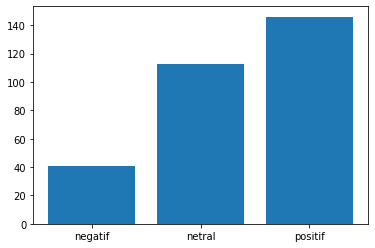

In [56]:
#Lakukan Sentiment Analysis 
print ("Nilai rata-rata: "+str(np.mean(hasil_sentimen)))
print ("Standar deviasi: "+str(np.std(hasil_sentimen)))


labels, counts = np.unique(hasil_sentimen2, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

## Sentimen masyarakat terhadap topik "Aset Kripto" bisa dibilang positif dikarenakan jumlah sentimen positif dan netral pada grafik mencapai 4/5 (dengan jumlah 260 sentimen dari sentimen positif dan negatif) dari total sentimen tweet

In [ ]:
#lakukan analisis dan tarik kesimpulan dari Text analysis dan Sentiment Analysis
#masukkan analisis kalian pada sel berikut.

"""
Kesimpulan

Dari text analisis bisa dilihat frekuensi banyak kata rata-rata tweet yang membahas
tentang aset kripto adalah 10 - 16 kata, tidak terlalu panjang
Sedangkan dari sentimen analisis, opini masyarakat tentang aset kripto bisa dibilang
positif dikarenakan jumlah sentimen positif dan netral mencapai 4/5 dari jumlah tweet
total.

"""